In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#data overview
iris=sns.load_dataset("iris")
print(iris["species"].unique())
iris.head()

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


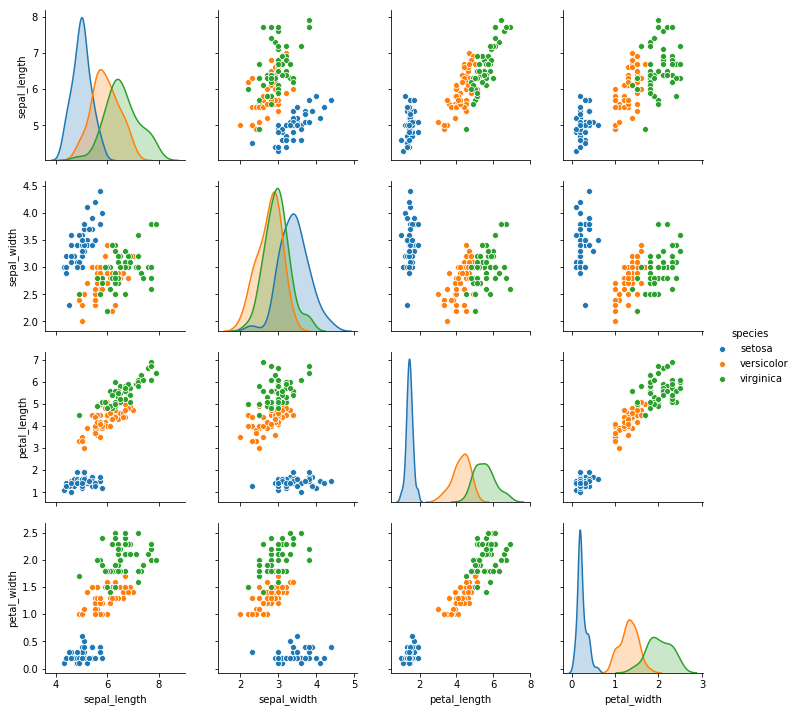

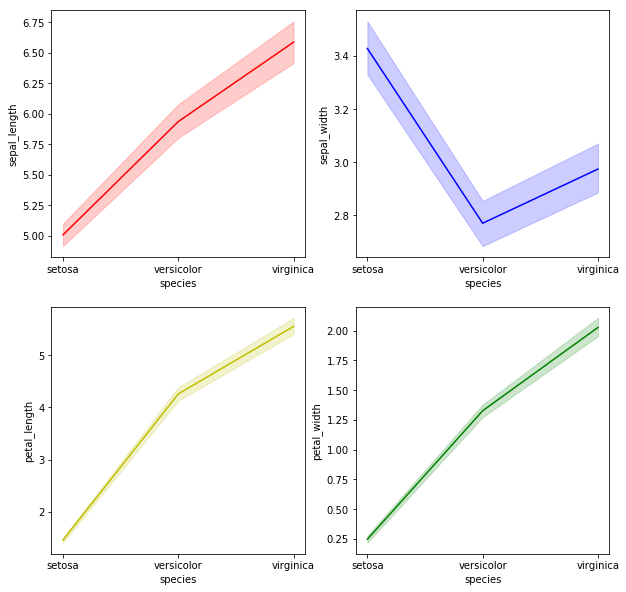

In [14]:
#plot data
sns.pairplot(iris, hue="species")

f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x='species', y='sepal_length', data=iris,color="r", ax=axes[0, 0])
sns.lineplot(x='species', y='sepal_width', data=iris, color="b", ax=axes[0, 1])
sns.lineplot(x='species', y='petal_length', data=iris,color="y",  ax=axes[1, 0])
sns.lineplot(x='species', y='petal_width', data=iris,color="g", ax=axes[1, 1])

plt.show()

In [26]:
#preprocessing
from sklearn.cross_validation import train_test_split

X=iris[["sepal_width","sepal_length","petal_width","petal_length"]]
y=iris["species"]
y.loc[y=="setosa"]=0
y.loc[y=="virginica"]=1
y.loc[y=="versicolor"]=2
print(y.unique())
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

[0 2 1]


In [27]:
# logistic regression
from sklearn.linear_model import LogisticRegression
LogRegmodel=LogisticRegression()
LogRegmodel.fit(X_train,y_train)
LRpred=LogRegmodel.predict(X_test)
print("Logistic Regression accuracy:{}".format(LogRegmodel.score(X_test,y_test)))

#SVM
from sklearn.svm import SVC
SVMmodel=SVC()
SVMmodel.fit(X_train,y_train)
SVMpred=LogRegmodel.predict(X_test)
print("SVM accuracy:{}".format(SVMmodel.score(X_test,y_test)))

Logistic Regression accuracy:0.9555555555555556
SVM accuracy:0.8888888888888888


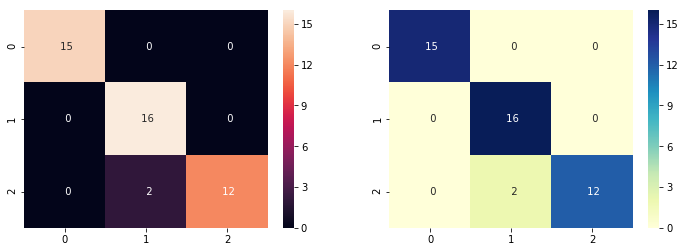

In [46]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,4))
axis1=plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,LRpred),annot=True,fmt='3.0f',cmap="rocket")
axis1=plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,SVMpred),annot=True,fmt='3.0f',cmap="YlGnBu")
